In [5]:
%matplotlib inline

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
city_data=pd.read_csv('Resources/city_data.csv')
city_data

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [8]:
city_data.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
city_data.isna().sum()

city            0
driver_count    0
type            0
dtype: int64

In [10]:
city_data.duplicated().sum()

0

In [11]:
ride_data=pd.read_csv('Resources/ride_data.csv')
ride_data

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12
4,South Jack,3/6/19 4:28,34.58,3.908450e+12
...,...,...,...,...
2370,Michaelberg,4/29/19 17:04,13.38,8.550370e+12
2371,Lake Latoyabury,1/30/19 0:05,20.76,9.018730e+12
2372,North Jaime,2/10/19 21:03,11.11,2.781340e+12
2373,West Heather,5/7/19 19:22,44.94,4.256850e+12


In [12]:
ride_data.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [13]:
ride_data['ride_id']=ride_data['ride_id'].astype(int)

In [14]:
ride_data.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
pyber_data_df=pd.merge(ride_data, city_data, on='city', how='left')
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/19 4:28,34.58,3908450000000,46,Urban
5,South Latoya,3/11/19 12:26,9.52,1995000000000,10,Urban
6,New Paulville,2/27/19 11:17,43.25,793208000000,44,Urban
7,Simpsonburgh,4/26/19 0:43,35.98,111954000000,21,Urban
8,South Karenland,1/8/19 3:28,35.09,7995620000000,4,Urban
9,North Jasmine,3/9/19 6:26,42.81,5327640000000,33,Urban


In [16]:
pyber_data_df.type.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [17]:
urban_cities_df=pyber_data_df[pyber_data_df['type']=='Urban']
suburban_cities_df=pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df=pyber_data_df[pyber_data_df['type']=='Rural']

In [18]:
urban_ride_count=urban_cities_df.groupby('city').count()['ride_id']
suburban_ride_count=suburban_cities_df.groupby('city').count()['ride_id']
rural_ride_count=rural_cities_df.groupby('city').count()['ride_id']

In [19]:
urban_avg_fare=urban_cities_df.groupby('city').mean()['fare']
suburban_avg_fare=suburban_cities_df.groupby('city').mean()['fare']
rural_avg_fare=rural_cities_df.groupby('city').mean()['fare']

In [20]:
urban_driver_count=urban_cities_df.groupby('city').mean()['driver_count']
suburban_driver_count=suburban_cities_df.groupby('city').mean()['driver_count']
rural_driver_count=rural_cities_df.groupby('city').mean()['driver_count']

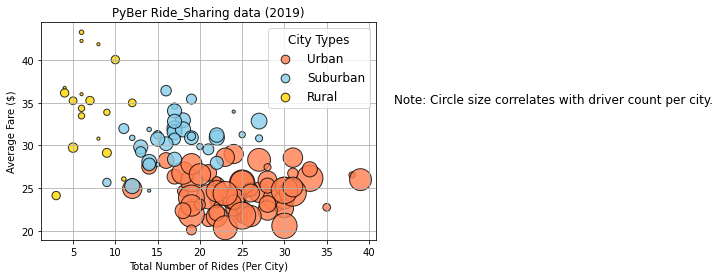

In [17]:

plt.scatter(urban_ride_count, urban_avg_fare, color='coral', edgecolor='black', alpha=0.8, label='Urban',
           s=10*urban_driver_count, linewidth=1)

plt.scatter(suburban_ride_count, suburban_avg_fare, color='skyblue', edgecolor='black', alpha=0.8, label='Suburban',
           s=10*suburban_driver_count, linewidth=1)

plt.scatter(rural_ride_count, rural_avg_fare, color='gold', edgecolor='black', alpha=0.8, label='Rural',
           s=10*rural_driver_count, linewidth=1)

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride_Sharing data (2019)')
plt.grid()

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(43, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
plt.savefig('Analysis/Fig1.png',bbox_inches='tight')
plt.show()

In [21]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [23]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [24]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [25]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [26]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [27]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [32]:
round(urban_ride_count.mean()), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(25, 17.36, 6.94)

In [33]:
urban_ride_count.median()

24.0

In [34]:
suburban_ride_count.median()

17.0

In [35]:
rural_ride_count.median()

6.0

In [36]:
urban_ride_count.mode()

0    22
1    25
Name: ride_id, dtype: int64

In [37]:
suburban_ride_count.mode()

0    17
Name: ride_id, dtype: int64

In [41]:
import numpy as np
import scipy.stats as sts

In [43]:
round(np.mean(urban_ride_count),2)

24.62

In [44]:
np.median(urban_ride_count)

24.0

In [49]:
sts.mode(urban_ride_count)

ModeResult(mode=array([22]), count=array([7]))

In [50]:
sts.mode(suburban_ride_count)

ModeResult(mode=array([17]), count=array([7]))

In [51]:
sts.mode(rural_ride_count)

ModeResult(mode=array([6]), count=array([5]))

In [53]:
sts.mode(urban_cities_df)
urban_cities_df.columns

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [55]:
urban_fare=urban_cities_df['fare']
suburban_fare=suburban_cities_df['fare']
rural_fare=rural_cities_df['fare']

In [56]:
round(np.mean(urban_fare),2), np.median(urban_fare), sts.mode(urban_fare)

(24.53, 24.64, ModeResult(mode=array([22.86]), count=array([5])))

In [57]:
round(np.mean(suburban_fare))

31

In [58]:
round(np.mean(rural_fare),2)

34.62

In [59]:
urban_driver=urban_cities_df['driver_count']
suburban_driver=suburban_cities_df['driver_count']
rural_driver=rural_cities_df['driver_count']

In [60]:
round(np.mean(urban_driver),2), np.median(urban_driver), sts.mode(urban_driver)

(36.68, 37.0, ModeResult(mode=array([39]), count=array([86])))

In [61]:
round(np.mean(suburban_driver),2), np.median(suburban_driver), sts.mode(suburban_driver)

(13.71, 16.0, ModeResult(mode=array([20]), count=array([79])))

In [62]:
round(np.mean(rural_driver),2), np.median(rural_driver), sts.mode(rural_driver)

(4.3, 4.0, ModeResult(mode=array([1]), count=array([32])))

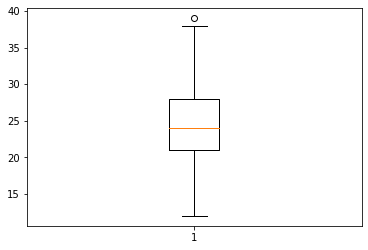

In [64]:
plt.boxplot(urban_ride_count)
plt.show()

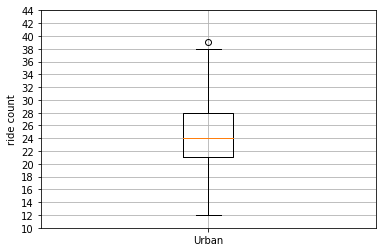

In [71]:
labels=['Urban']
fig, ax=plt.subplots()
ax.boxplot(urban_ride_count, labels=labels)
ax.set_ylabel('ride count')
ax.set_yticks(np.arange(10, 46, step=2))
plt.grid()
plt.show()

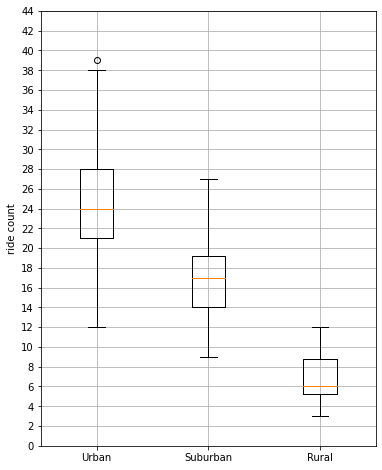

In [76]:
ride_count_data=[urban_ride_count, suburban_ride_count, rural_ride_count]
x_labels=['Urban', 'Suburban', 'Rural']
fig, ax=plt.subplots(figsize=(6,8))
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_ylabel('ride count')
ax.set_yticks(np.arange(0, 45, step=2))
ax.grid()
plt.show()

In [73]:
urban_ride_count.max()

39

In [82]:
outlier_city=urban_ride_count[urban_ride_count==urban_ride_count.max()].index[0]
type(outlier_city)

str

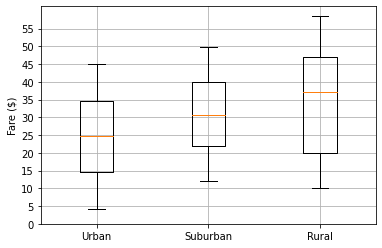

In [86]:
fare_data=[urban_fare, suburban_fare, rural_fare]
x_labels=['Urban', 'Suburban', 'Rural']
fig, ax=plt.subplots()
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5))
ax.set_ylabel('Fare ($)')
ax.grid()
plt.show()


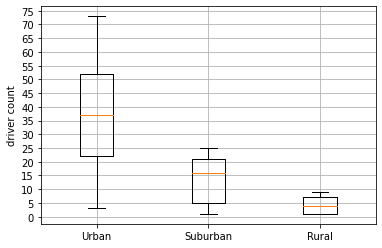

In [90]:
driver_data=[urban_driver, suburban_driver, rural_driver]
x_labels=['Urban', 'Suburban', 'Rural']
fig, ax=plt.subplots()
ax.boxplot(driver_data, labels=x_labels)
ax.set_yticks(np.arange(0, 76, step=5))
ax.set_ylabel('driver count')
ax.grid()
plt.savefig('Analysis/Fig2.png')
plt.show()
